# HW2: Model Explanability

## 1. Load data for modeling.  This data represents taxi rides in NY (from a Kaggle competition)

In [1]:
import math
import scipy
import warnings
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import xgboost as xgb
import matplotlib.pylab as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

matplotlib.use('nbagg');
warnings.filterwarnings("ignore");
%matplotlib inline

In [2]:
# Download the data (public github)
!wget -N https://github.com/rfox12-edu/explainability-sandbox/raw/main/x_train.parquet.gzip
!wget -N https://github.com/rfox12-edu/explainability-sandbox/raw/main/x_test.parquet.gzip
!wget -N https://github.com/rfox12-edu/explainability-sandbox/raw/main/y_train.parquet.gzip
!wget -N https://github.com/rfox12-edu/explainability-sandbox/raw/main/y_test.parquet.gzip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.
'wget' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import requests

urls = [
    "https://github.com/rfox12-edu/explainability-sandbox/raw/main/x_train.parquet.gzip",
    "https://github.com/rfox12-edu/explainability-sandbox/raw/main/x_test.parquet.gzip",
    "https://github.com/rfox12-edu/explainability-sandbox/raw/main/y_train.parquet.gzip",
    "https://github.com/rfox12-edu/explainability-sandbox/raw/main/y_test.parquet.gzip"
]

filenames = [
    "x_train.parquet.gzip",
    "x_test.parquet.gzip",
    "y_train.parquet.gzip",
    "y_test.parquet.gzip"
]

for url, filename in zip(urls, filenames):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)


In [8]:
# Load the data into pandas dataframes
x_train = pd.read_parquet('data/x_train.parquet.gzip')
x_test = pd.read_parquet('data/x_test.parquet.gzip')
y_train = pd.read_parquet('data/y_train.parquet.gzip')
y_test = pd.read_parquet('data/y_test.parquet.gzip')

## 2. Model Build

### Random Forest Regression

In [9]:
regr_rf = RandomForestRegressor(max_features='sqrt', min_samples_leaf = 4,
    min_samples_split = 3, n_estimators = 40, n_jobs = -1)
regr_rf.fit(x_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [10]:
y_train_pred_rf = regr_rf.predict(x_train)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)

y_pred_rf = regr_rf.predict(x_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(mse_rf)

166.62148138918363


In [15]:
print("Training MSE (Random Forest):", mse_train_rf)
print("Test MSE (Random Forest):", mse_rf)

Training MSE (Random Forest): 83.25426762280827
Test MSE (Random Forest): 166.62148138918363


### XGboost Regression

In [11]:
regr_xgb = xgb.XGBRegressor(
    learning_rate=0.1, n_estimators=1000, max_depth=3, min_child_weight=3,
    gamma=0, subsample=0.8, reg_alpha=200, reg_lambda=200, colsample_bytree=0.8, n_jobs=-1
)
regr_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [12]:
# Predicting on train & test data using our trained XgBoost regressor model
y_train_pred_xgb = regr_xgb.predict(x_train)
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)

y_pred_xgb = regr_xgb.predict(x_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print(mse_xgb)

168.04553550344372


In [16]:
print("Training MSE (XGBoost):", mse_train_xgb)
print("Test MSE (XGBoost):", mse_xgb)

Training MSE (XGBoost): 158.25163804732728
Test MSE (XGBoost): 168.04553550344372


### Feed forward NN: MLP

In [13]:
regr_mlp = MLPRegressor(
        hidden_layer_sizes=[50, 25],
        activation='relu',
        solver='adam',
        early_stopping=True,
        random_state=33
)
regr_mlp.fit(x_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=[50, 25], random_state=33)

In [14]:
y_train_pred_mlp = regr_mlp.predict(x_train)
mse_train_mlp = mean_squared_error(y_train, y_train_pred_mlp)

y_pred_mlp = regr_mlp.predict(x_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)

print(mse_mlp)

163.90548439517625


In [17]:
print("Training MSE (MLP):", mse_train_mlp)
print("Test MSE (MLP):", mse_mlp)

Training MSE (MLP): 166.36158474862742
Test MSE (MLP): 163.90548439517625


### Q1 (5pts): Which model is the most over-fit to its training data?

Random Forest is most over-fit to its training data.


| Model                      | Type       | Test MSE     | Train MSE    | Difference   | Over-fit |
|---------------------------|------------|--------------|--------------|--------------|-----------|
| Random Forest             | Regression | 166.6214814  | 83.25426762  | 83.36721378  | Significant |
| XGBoost                   | Regression | 168.0455355  | 158.25163805 | 9.79389755   | Moderate |
| Feed Forward NN: MLP      | Regression | 163.9054844  | 166.36158475 | -2.45610035  | Minimal |



### Q2 (5pts): Is AUC an appropriate metric to evaluate these models?  Why or why not?

No, AUC is not an appropriate metric for evaluating regression models. AUC is specifically designed for classification tasks, particularly for binary classification problems.

- AUC measures how well a model can tell the difference between categories (like yes/no), not continuous numbers (like prices or temperatures).
- Regression models give continuous predictions, while AUC needs clear categories. Changing continuous predictions into categories can lose important details.
- For regression it's better to use metrics like MSE, MAE, or R squared which show how close the predictions are to the actual values.

# Global Explanability

## Random Forest Feature Importance

### Q3 (5pts): Why is it important to look the overall predictive power of a model before looking at feature importance for that model?

- Checking the overall predictive power tells you how well the model performs in making predictions. If the model isn't good overall, knowing which features are important won’t be very helpful.
- If the model’s performance is low, you might need to improve the model itself before worrying about which features contribute to its decisions. It helps to prioritize your efforts effectively.
- Knowing how well the model works first gives you context when looking at feature importance. You can better understand how much each feature actually influences the predictions compared to the model’s overall performance.

### Q4 (5pts): How could you validate that these regression models are providing any predictive power at all? [you do not have to write code to answer this question]

- I could split my dataset into training and testing sets. I'd train my model on the training set and then test it on the testing set. If my model's predictions are better than random guessing on the test data, that shows it has some predictive power.
- I could calculate performance metrics like Mean Squared Error (MSE) or Mean Absolute Error (MAE). If the errors are low, it means my model is making good predictions.
- Maybe create a simple baseline model like predicting the average value of the target variable. If my regression models do better than this baseline, it proves they have real predictive ability.

In [18]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ':  FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

In [19]:
def permutation_based_feature_importance(x_test, y_test, initial_mse, model):

    # Initialize an array to store feature importances
    feature_importances = np.zeros(x_test.shape[1])

    # Number of permutation iterations (you can adjust this value)
    num_iterations = 100

    # Calculate feature importance by permuting one feature at a time
    ####################### CODE HERE ############################
    for feature in range(x_test.shape[1]):
        print('Permuting feature ',feature + 1)
        # Copy the original test data
        x_test_permuted = x_test.copy()

        # Shuffle the values of the current feature
        permuted_column = x_test_permuted.iloc[:, feature]
        np.random.shuffle(permuted_column)
        x_test_permuted.iloc[:, feature] = permuted_column

        # Calculate the accuracy with the permuted feature
        permuted_mse = mean_squared_error(y_test, model.predict(x_test_permuted))

        # Calculate the drop in accuracy and store it as feature importance
        feature_importances[feature] = initial_mse - permuted_mse

    # Normalize the feature importances
    feature_importances /= feature_importances.sum()

    # Get the names of the features (assuming X is a DataFrame)
    feature_names = x_test.columns

    # Sort features by importance
    sorted_idx = np.argsort(feature_importances)

    return feature_importances[sorted_idx]

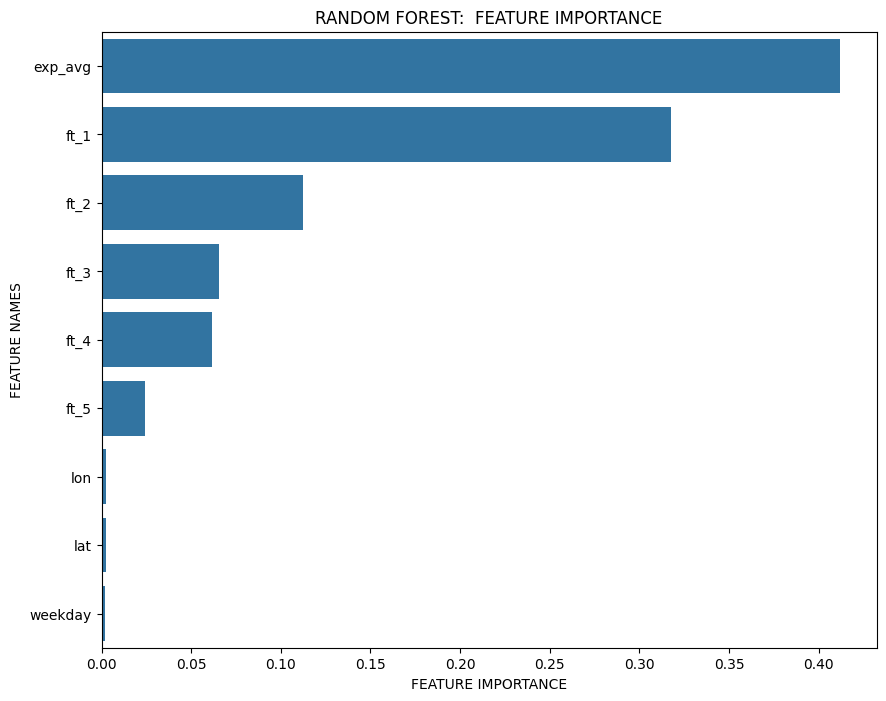

In [22]:
plot_feature_importance(regr_rf.feature_importances_,x_train.columns,'RANDOM FOREST')

In [23]:
permutation_based_feature_importance_rf = permutation_based_feature_importance(x_train, y_train, mse_train_rf, regr_rf)
# takes a looot of time to run so run mutliple times only if needed

Permuting feature  1
Permuting feature  2
Permuting feature  3
Permuting feature  4
Permuting feature  5
Permuting feature  6
Permuting feature  7
Permuting feature  8
Permuting feature  9


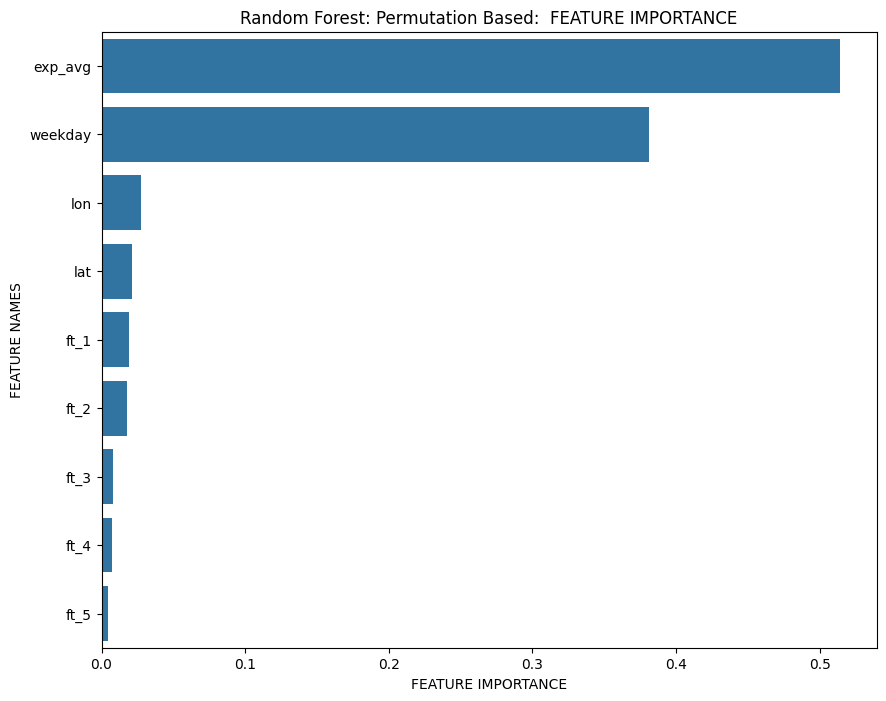

In [24]:
plot_feature_importance(permutation_based_feature_importance_rf,x_train.columns,'Random Forest: Permutation Based')

### Q5 (5pts): Is the `weekday` feature important to the `regr_rf` model?

No. According to the plot, the regr_rf model gives it an importance score of close to 0.

### Q6 (5pts): Is the `weekday` feature important to predicting the target?

Yes! The permutation based feature importance plot shows that the weekday feature is actually quite important for predicting the target variable. This suggests that the weekday feature is being ignored by the regr_rf model

### Q7 (10pts): Is the `.feature_importances_` of the `regr_rf` model reliable?  Why or why not?  [hint](https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html)

No. The .feature_importances_ attribute of the regr_rf model is not reliable in this case. It indicates that the weekday feature is not important, while permutation feature importance shows the opposite. This suggests that the model is not learning the true importance of weekday and may be overfitting.

### Q8 (5pts): Are there any highly correlated features in this dataset?  Which ones?

Based on the plots, exp_avg and ft_1 are likely to be highly correlated. The feature importance for ft_1 is much lower using permutation feature importance, suggesting that exp_avg is likely dominating the relationship between ft_1 and the target.

### Q9 (5pts): What is the impact of highly correlated features on the analysis of feature importance for these models?

Highly correlated features can make it difficult to determine which feature is truly responsible for the relationship with the target. In this case, the .feature_importances_ attribute of regr_rf is likely giving more credit to exp_avg for the relationship, even though ft_1 may also be relevant. Permutation feature importance breaks the relationships between features which can help to identify these situations. In this case it shows that ft_1 likely does have some predictive power and is not just piggybacking on the importance of exp_avg.

## Random Forest Feature Analysis

In [25]:
from sklearn.inspection import PartialDependenceDisplay

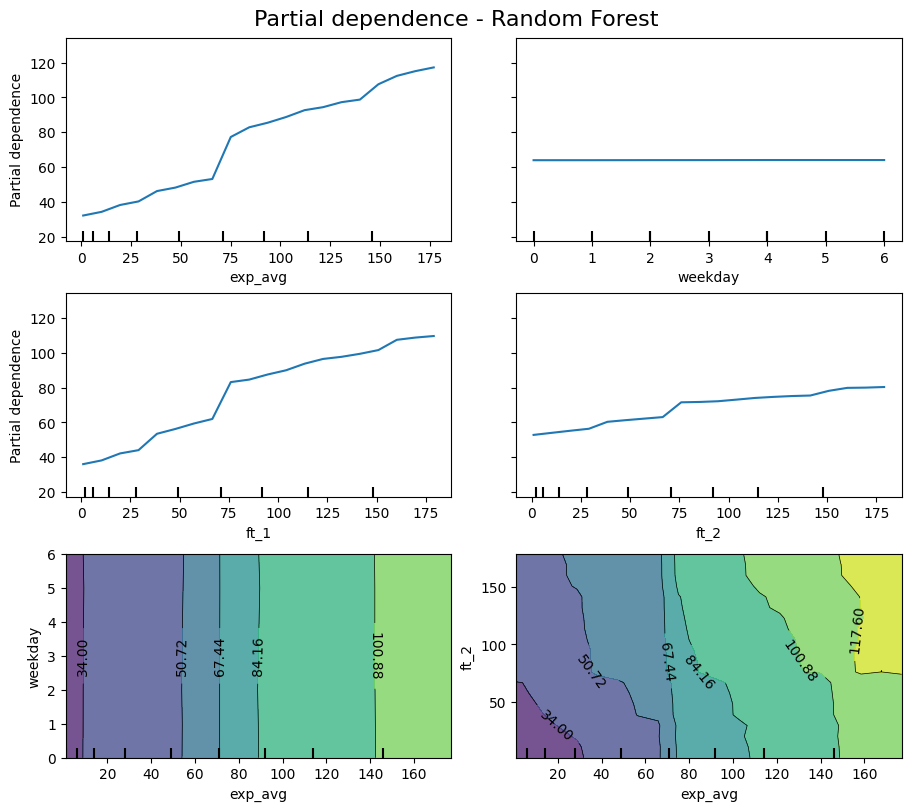

In [26]:
common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": ["exp_avg", 'weekday', 'ft_1', 'ft_2', ("exp_avg", 'weekday'), ("exp_avg", 'ft_2')],
    # type of partial dependence plot
    "kind": "average"
}

_, ax = plt.subplots(ncols=2, nrows=3, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    regr_rf,
    x_train,
    **features_info,
    ax=ax,
    **common_params,
)

_ = display.figure_.suptitle(("Partial dependence - Random Forest"),fontsize=16)

### Q8 (5pts): Explain the partial dependence plot of 'exp_avg'.

The partial dependence plot for exp_avg shows that the predicted value increases as the value of exp_avg increases. The relationship is not linear, suggesting that the model has learned a more complex relationship between exp_avg and the target variable. The plot indicates that increasing the exp_avg value, the predicted value of the target also tends to increase.

### Q9 (10pts): Is there any interaction between 'exp_avg' and 'weekday'? How about 'exp_avg' and 'ft_2'?


There is no interaction between exp_avg and weekday. The partial dependence plot for weekday shows a flat line, meaning that the predicted value is independent of the value of weekday. On the other hand, there is a strong interaction between exp_avg and ft_2. The partial dependence plot for exp_avg and ft_2 shows that the effect of exp_avg on the predicted value changes significantly depending on the value of ft_2. This suggests that the model has learned a complex relationship between these two features.

In [27]:
!pip install shap

In [28]:
import shap

In [ ]:
explainer_rf = shap.Explainer(regr_rf, x_train)

In [ ]:
shap_values_rf = explainer_rf(x_test[0:1000])

In [ ]:
shap.summary_plot(shap_values_rf, x_test[0:1000])

### Q10 (5pts): Is `weekday` showing as an important factor on prediction explanations via SHAP?


## XGBoost Feature Importance

In [ ]:
plot_feature_importance(regr_xgb.feature_importances_,x_train.columns,'XGBoost')

In [ ]:
permutation_based_feature_importance_xgb = permutation_based_feature_importance(x_train, y_train, mse_train_xgb, regr_xgb)

plot_feature_importance(permutation_based_feature_importance_xgb,x_train.columns,'XGBoost: Permutation Based')

### Q11 (10pts): Based on the permutation-method feature importance chart for the XGBoost model, would you recommend that the model take out the less influential variables ft_1, ft_2, ft_3, ft_4, and ft_5 ?  Why or why not?


## XGBoost Feature Analysis

In [ ]:
_, ax = plt.subplots(ncols=2, nrows=3, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    regr_xgb,
    x_train,
    **features_info,
    ax=ax,
    **common_params,
)

_ = display.figure_.suptitle(("Partial dependence - XGBoost"),fontsize=16)

In [ ]:
explainer_xgb = shap.Explainer(regr_xgb, x_train)
shap_values_xgb = explainer_xgb(x_test[0:100])

In [ ]:
shap.summary_plot(shap_values_xgb, x_test[0:100])

## MLP Feature Importance

In [ ]:
permutation_based_feature_importance_mlp = permutation_based_feature_importance(x_train, y_train, mse_train_mlp, regr_mlp)

plot_feature_importance(permutation_based_feature_importance_mlp,x_train.columns,'MLP: Permutation Based')

## MLP Feature Analysis

In [ ]:
_, ax = plt.subplots(ncols=2, nrows=3, figsize=(9, 8), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    regr_mlp,
    x_train,
    **features_info,
    ax=ax,
    **common_params,
)

_ = display.figure_.suptitle(("Partial dependence - MLP"),fontsize=16)

In [ ]:
# for NN, we use 'KernelExplainer', but it's very very slow. So we use 'shap.sample' to sample a subset.
n_samples = 100
explainer_mlp = shap.KernelExplainer(regr_mlp.predict, shap.sample(x_train, n_samples))

In [ ]:
shap_values_mlp = explainer_mlp(x_test[0:100])

In [ ]:
shap.summary_plot(shap_values_mlp, x_test[0:100])

# Local Explainability

## Random Forest SHAP

In [ ]:
x_test[:1]

In [ ]:
print('Actual:', y_test['target'].iloc[0], 'Random Forest:', y_pred_rf[:1], 'XGBoost:', y_pred_xgb[:1], 'MLP:', y_pred_mlp[:1])

In [ ]:
shap.plots.waterfall(shap_values_rf[0])

In [ ]:
shap.plots.bar(shap_values_rf[0])

### Q12 (5pts): What is the difference between the plots shown by `shap.plots.waterfall` and `shap.plots.bar`?

In [ ]:
shap.plots.waterfall(shap_values_xgb[0])

In [ ]:
shap.plots.waterfall(shap_values_mlp[0])

### Q13 (5pts): How is it possible that two models (like the XGBoost and MLP models above) can have very similar permutation feature importance but very different SHAP explanations for the same data point?

In [ ]:
test_prediction = x_test[0:1].assign(lon=-95.369804,lat=29.760427)
test_prediction

In [ ]:
shap_values_test = explainer_xgb(test_prediction)
shap.plots.waterfall(shap_values_test[0])

### Q14 (5pts): Are feature effects independent from each other in our SHAP XGBoost explainer?

### Q15 (5pts): `lon=-95.369804,lat=29.760427` is Houston, TX.  What would a data scientist need to do to create good explanations for this region?